<a href="https://colab.research.google.com/github/tensorvijay/Mtechcen/blob/master/Copy_of_Python_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os

3. A shopkeeper want to give his clients the balance amount with minimum number of notes.
Write a program to find out the notes and their counts, so that the total number of notes is
minimum.
Eg: If he has entered 1339, the system should display ( the counts given for 5 in the question is wrong )

In [ ]:
def c_n_notes(m,n):    # current and next notes
  return m // n, m %n

In [ ]:
def r_m_change(a):
  counts = []
  notes = ["2000", "500", "200","100","50","20","10","5","2","1"]
  for i in notes:
    m,n = c_n_notes(a,int(i))
    counts.append(m)
    a=n
  data = {"Notes":notes,"Counts":counts}
  df=pd.DataFrame(data)
  return df


In [ ]:
r_m_change(2339)

,Notes,Counts
0,2000,1
1,500,0
2,200,1
3,100,1
4,50,0
5,20,1
6,10,1
7,5,1
8,2,2
9,1,0


2. Get a number, Make the 2 MSBs one. Print the result – both as decimal and binary.

In [ ]:
def bin_dec(bl):
 dl=[]
 #l,_=bl
 ind=0
 for i in bl:
  ind+=1
  p=2**(ind-1)
  dl.append(int(i)*p)
  #dl.append(int(i)*2**(ind-1))
 dec=sum(dl)
 return dec

def dec_bin(a):
  bin=[]
  mm=['1','1']
  while a >0:
   r=a%2
   q=a//2
   bin.append(str(r))
   #bin[::-1]
   a=q
  #print("odec,obin,mdec,mbin",a,"".join(bin[::-1],bin_dec(bin[:-2]+mm),"".join(bin[:-2]+mm)))
  return bin

def fprint(a):
  t1=dec_bin(a)  #before we get the reverse
  t2=t1[:-2]+['1','1']
  print("od,ob,md,mb",a,"".join(t1[::-1]),bin_dec(t2),"".join(t2[::-1]))  #original decimal, original binary, modified decimal, modified binary


In [ ]:
fprint(10)    #original decimal, original binary, modified decimal, modified binary

od,ob,md,mb 10 1010 14 1110


4. Caesar cipher is a method to encrypt (make a secret code) a string. It is achieved by
advancing each digit n places. Write a program to read a text file, get the string and encrypt
it first using Caesar and then XORing with a salt and write it back to <filename>_enc.txt.
Eg: abcd
places to shift: 3
Encrypted Caesar String: defg
Now encrypt it with a salt lets say ‘abc’

In [ ]:
def cixor(source,tshift,salt):
 #tshift=4
 k=0
 result = []
 salt
 filename=os.path.basename(source)
 #print(source)
 with open(source, "r") as f:
  for line in f:
    for word in line: #line.split():
      #print(word)
      for char in word:
        if char.isalpha():
          k+=1

          slt=ord(salt[k%len(salt)])
          fin=chr((((ord(char)+tshift-97)%26+97)^slt)+97)

          result.append(fin)

        if char.isspace():
          #print(char)
          result.append(char)

  tog="".join(result)
  with open(filename + "_enc",'w') as f:
    f.write(tog)
  return "".join(result)







In [ ]:
txt=cixor("/content/Textfileforpythonassignment",7,"abc")
txt

'io l gpyo cx rvxq vco{ anp fnvso hx|qk dv mswk uba dmn ivdxcye xxyc ysjorf nxixgpk gtan lsr coo hnkqan uxgpy kwk lpjach dmjd wjdbyo jjx knycxg luj tu yvvo uskjny l co{h vlykiryp xx pj|co i coswt i zoubsj uxswa dv lxirk \n'

In [ ]:
import csv

In [ ]:
def rdwrt_csv(source):
  nums = []
  ncsv = []
  with open(source, 'r') as f:
    reader = csv.reader(f)
    next(reader, None)
    for row in reader:
      ncsv.append((row[0], row[1]))
      try:
        tmp = int(row[1])
        nums.append(tmp)
      except ValueError:
        pass
  ncsv.append(('Average', avsum(nums)))
  ncsv.append(('Variance', var(nums)))
  ncsv.append(('std', np.sqrt(var(nums))))
  return ncsv,nums

def avsum(nmb):
  #tmp=nmb
  sum=0
  for i in nmb:
   #print('number',i)
   sum += i
   #print('sum',sum)
  return round(sum/len(nmb),2)

def write(source):
 with open(source, 'w') as f:
  writer = csv.writer(f)
  writer.writerow(['Average',vsum(rdwrt_csv(source))])
  #writer.writerow([vsum(rdwrt_csv(source))])
  #f.write(str(vsum(rdwrt_csv(source))))
  #reader = csv.reader(f)

def var(nmb):
  mu=avsum(nmb)
  return avsum((np.array(nmb)-mu)**2)


In [ ]:
loc='/content/sample_test.csv'
tocsv,nums=rdwrt_csv(loc)

In [ ]:
with open('newsample.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Username', 'Identifier'])
    writer.writerows(tocsv)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
tocsv[0][0]

'booker12'

In [ ]:
keys, values = zip(*tocsv)
n_n_v = list(map(int, values))

In [ ]:
non_numeric_values

[9012, 2070, 4081, 9346, 5079, 1234, 5678, 22323, 1233, 6672, 38683511, 6219]

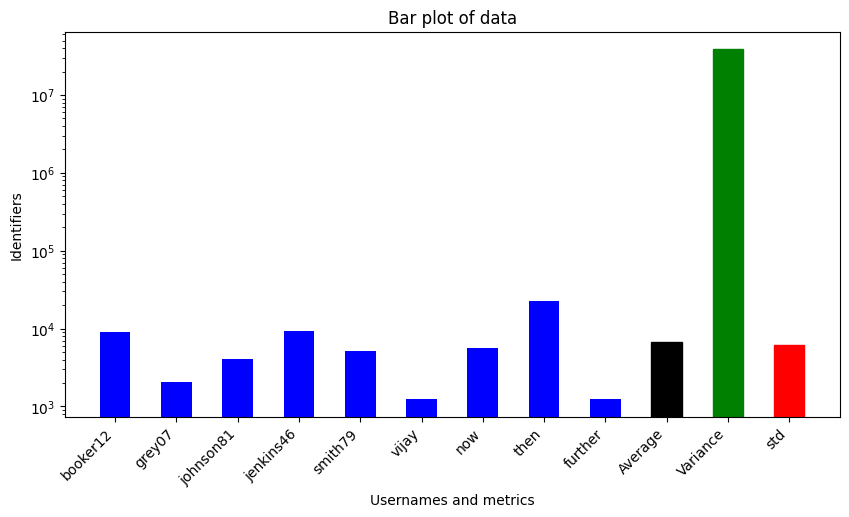

In [ ]:
plt.figure(figsize=(10, 5))
bar=plt.bar(keys, n_n_v, color='blue',width=0.5)
bar[-1].set_color('red')
bar[-2].set_color('green')
bar[-3].set_color('black')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.xlabel('Usernames and metrics')
plt.ylabel('Identifiers')
plt.title('Bar plot of data')
plt.show()

In [ ]:
import json

6. Write a program to compare two JSONS which are structurally similar. The output should be
another JSON which contains the tags that has different values. You may expect the JSONS
can have nested structures.

In [ ]:
def strtonum(word):
    date = word.split('-')
    day = int(date[0])
    month = int(date[1])
    year = int(date[2])
    return day, month, year

def compare_dates(info1, info2):
    date1 = info1['dob']
    date2 = info2['dob']
    date11, date22 = strtonum(date1), strtonum(date2)
    yr = abs(date11[0] - date22[0])
    mnth = abs(date11[1] - date22[1])
    day = abs(date11[2] - date22[2])
    return str(yr * 365 + mnth * 30 + day)

def only_in(info1, info2):
    keys_list1 = list(info1.keys())
    keys_list2 = list(info2.keys())
    if len(keys_list1) > len(keys_list2):
        for x in keys_list1:
            if x not in keys_list2:
                return x + ": Only in 1"
    else:
        for x in keys_list2:
            if x not in keys_list1:
                return x + ": Only in 2"

def name_change(info1, info2):
    if info1["name"] != info2["name"]:
        return "Text change"
    return None

def dec_comp(info1, info2, key):
    return str(round(info1[key] - info2[key], 2))

def create_Json(info1, info2):
    data3 = {}

    # Compare numeric keys only if they exist in both JSON objects
    for key in ['x', 'y', 'z']:
        if key in info1 and key in info2:
            data3[key] = dec_comp(info1, info2, key)
        elif key in info1:
            data3[key] = "Only in 1"
        elif key in info2:
            data3[key] = "Only in 2"

    # Handle name comparison
    name_diff = name_change(info1, info2)
    if name_diff:
        data3['name'] = name_diff

    # Handle date comparison
    data3['dob'] = compare_dates(info1, info2)

    # Handle any additional keys that may be missing in one of the JSONs
    only_in_key = only_in(info1, info2)
    if only_in_key:
        key, value = only_in_key.split(":")
        data3[key] = value.strip()

    return json.dumps(data3, indent=4)

# Example data
data1 = '''{
    "x": 10.1,
    "y": 20,
    "name": "Anu",
    "dob": "2010-10-10"
}'''

data2 = '''{
    "x": 10,
    "y": 20,
    "name": "Ani",
    "dob": "2010-10-11",
    "z": 100
}'''

info1 = json.loads(data1)
info2 = json.loads(data2)

output_json = create_Json(info1, info2)
print(output_json)

# Example data
data1 = '''{
    "x": 10.1,
    "y": 20,
    "name": "Anu",
    "dob": "2010-10-10"
}'''

data2 = '''{
    "x": 10,
    "y": 20,
    "name": "Ani",
    "dob": "2010-10-11",
    "z": 100
}'''

info1 = json.loads(data1)
info2 = json.loads(data2)

output_json = create_Json(info1, info2)
print(output_json)

{
    "x": "0.1",
    "y": "0",
    "z": "Only in 2",
    "name": "Text change",
    "dob": "1"
}
{
    "x": "0.1",
    "y": "0",
    "z": "Only in 2",
    "name": "Text change",
    "dob": "1"
}


5. Calculate Cos (x) using Maclaurin Series and plot the series with matplotlib
You should implement a package mymath and import that. Don’t use any of the prebuilt
libraries for finding power or factorial.

Contents of the Mymath.pyfile

In [ ]:
'''
contents of the mymath.py file
def factorial(n):
  if n == 0:
    return 1
  else:
    return n * factorial(n-1)

def tcos(x):
 res=0
 for i in range(1,34):
  res+=power(-1,i)*power(x,(2*i))/factorial(2*i)
 return 1+res

def power(n,p):
  if p==1:
    #print("hai",n,p)
    return n
  else:
    #print("hello",n,p)
   # print(p)
    return n*power(n,p-1)

def series(li):
  x=[]
  for i in range(0,li):
    x.append(i)
  return x

def tcoslist(x,li):
  tli=[]
  for i in x:
   tli.append(tcos(x[i],li))
  return tli

'''

'\ncontents of the mymath.py file\ndef factorial(n):\n  if n == 0:\n    return 1\n  else:\n    return n * factorial(n-1)\n\ndef tcos(x):\n res=0\n for i in range(1,34):\n  res+=power(-1,i)*power(x,(2*i))/factorial(2*i)\n return 1+res\n\ndef power(n,p):\n  if p==1:\n    #print("hai",n,p)\n    return n\n  else:\n    #print("hello",n,p)\n   # print(p)\n    return n*power(n,p-1)\n\n'

In [ ]:
pip install /mymath_package.tar.xz

Processing /mymath_package.tar.xz
  Preparing metadata (setup.py) ... done
  Created wheel for mymath_package: filename=mymath_package-0.1-py3-none-any.whl size=1659 sha256=4606cce4f8cd40dbf80d07444e4dd787d2c47e9d00bc1ade9e87bdce88a59ce4
  Stored in directory: /tmp/pip-ephem-wheel-cache-scchvquc/wheels/ad/4f/96/d63443594eb3e8212263a89fe67af1c5c853116b1050d20417
Successfully built mymath_package


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from mymath import factorial, tcos, power, series, tcoslist

# Example usage
print(factorial(5))
print(tcos(0.5,20))


120
0.8775825618903728


Text(0, 0.5, 'value')

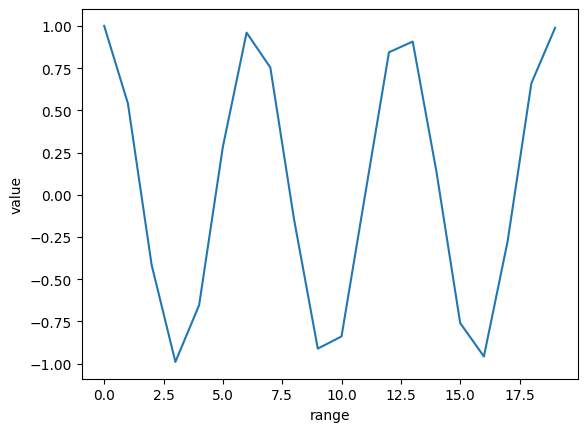

In [ ]:
x1=series(20)
plt.plot(x1,tcoslist(x1,34))
plt.xlabel('range')
plt.ylabel('value')